# Tarea Final Programación para Ciencias de Datos

Lo que haremos primero sera cargar las liberias necesarias para el desarrollo de esta tarea

In [85]:
import requests
import os 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

A continuación lo que haremos es descargar los datos de divorcios de la pegina de Datos Abiertos Sonora

In [86]:
base = 'https://datos.sonora.gob.mx/dataset/c6140d53-1f16-4dd8-8ab3-d2b47f03a921/resource/'
urls = ['7c2ff3d4-f06c-4fd4-ac1b-07155d9eb520/download/divorcios_2015.csv',
        '59461859-0f2a-41ef-aea5-b49df1f43a66/download/divorcios_2016.csv',
        '21d4a2ff-bec9-4498-a37a-2b48cfdd929e/download/divorcios_2017.csv',
        '39edb165-c5b9-4cac-a2ac-82112d4a0fc5/download/divorcios_2018.csv',
        '8d407838-7af7-4345-b807-008f943a5cd1/download/divorcios_2019.csv',
        'e905e83e-da05-4a9a-b024-50d3948ab32f/download/divorcios_2020.csv',
        'edf5ef44-57b4-4ff1-a1c6-f3f7cc7aec79/download/divorcios_2021.csv',
        '63940761-d099-4a39-bb92-e81e4a6d31e1/download/divorcios_2022.csv',
    ]

Guardamos todo en un DataFrame que contenga toda la información de los archivos que descargamos

In [87]:
i=0
for url in urls:
    if not os.path.exists(os.getcwd() + '/divorcios'+str(2015+i)+'.csv' ):
        r= requests.get(base + url)

        with open('divorcios'+str(2015+i)+'.csv', 'wb') as f:
            f.write(r.content)
    if i == 0:
        divorcios = pd.read_csv('divorcios2015.csv')
    else:
        divorcio = pd.read_csv('divorcios'+str(2015+i)+'.csv')
        divorcios = pd.concat([divorcios,divorcio], ignore_index= True) 
    i+=1
divorcios.reset_index(drop=True)

,municipio,fecha_matrimonio,año_registro,mes_registro,edad_div1,edad_div2,sexo_div1,sexo_div2,dia_registro
0,66,NaN,2015,4,62.0,49.0,M,F,10
1,66,NaN,2015,4,NaN,NaN,NaN,NaN,10
2,66,NaN,2015,4,NaN,NaN,NaN,NaN,10
3,30,16/07/1998,2015,8,49.0,40.0,M,F,11
4,55,16/06/2006,2015,3,47.0,38.0,M,F,30
...,...,...,...,...,...,...,...,...,...
13775,18,13/08/1982,2022,12,72.0,63.0,M,F,30
13776,18,03/03/2006,2022,12,40.0,40.0,M,F,30
13777,21,27/06/2000,2022,12,42.0,41.0,M,F,30
13778,30,NaN,2022,7,48.0,51.0,M,F,6


Lo que haremos es una limpieza rapida de los datos

In [88]:
divorcios.dropna(inplace=True)

Si eliminas los datos faltantes tenemos que nos quedan un total de 13273 datos de 13780, por lo que solamente tenemos 7 filas con datos faltantes, lo cual no representa gran problema ypodemos eliminarlos.

In [89]:
divorcios.reset_index(drop=True)

,municipio,fecha_matrimonio,año_registro,mes_registro,edad_div1,edad_div2,sexo_div1,sexo_div2,dia_registro
0,30,16/07/1998,2015,8,49.0,40.0,M,F,11
1,55,16/06/2006,2015,3,47.0,38.0,M,F,30
2,30,03/05/1999,2015,11,35.0,34.0,M,F,6
3,30,13/03/1994,2015,5,43.0,39.0,M,F,5
4,30,01/03/2014,2015,6,28.0,29.0,M,F,30
...,...,...,...,...,...,...,...,...,...
13268,18,25/11/1982,2022,12,64.0,66.0,M,F,30
13269,18,13/08/1982,2022,12,72.0,63.0,M,F,30
13270,18,03/03/2006,2022,12,40.0,40.0,M,F,30
13271,21,27/06/2000,2022,12,42.0,41.0,M,F,30


ahora lo que haremos en crear una nuava fila que sea fecha de registro, y asignarle el tipo adecuado a cada columna

In [90]:
divorcios.rename(columns={
    'año_registro': 'year', 
    'mes_registro': 'month', 
    'dia_registro': 'day'
}, inplace=True)

# Crear la columna de fecha
divorcios['fecha_registro'] = pd.to_datetime(divorcios[['year', 'month', 'day']])


In [91]:
divorcios = divorcios.drop(columns=['year','month','day'])

In [92]:
divorcios.fecha_matrimonio = pd.to_datetime(divorcios.fecha_matrimonio, errors='coerce')

/tmp/ipykernel_125/2219772302.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  divorcios.fecha_matrimonio = pd.to_datetime(divorcios.fecha_matrimonio, errors='coerce')


In [93]:
divorcios.dropna(inplace=True)

In [94]:
divorcios.reset_index(drop=True)

,municipio,fecha_matrimonio,edad_div1,edad_div2,sexo_div1,sexo_div2,fecha_registro
0,30,1998-07-16,49.0,40.0,M,F,2015-08-11
1,55,2006-06-16,47.0,38.0,M,F,2015-03-30
2,30,1999-05-03,35.0,34.0,M,F,2015-11-06
3,30,1994-03-13,43.0,39.0,M,F,2015-05-05
4,30,2014-03-01,28.0,29.0,M,F,2015-06-30
...,...,...,...,...,...,...,...
13260,18,1982-11-25,64.0,66.0,M,F,2022-12-30
13261,18,1982-08-13,72.0,63.0,M,F,2022-12-30
13262,18,2006-03-03,40.0,40.0,M,F,2022-12-30
13263,21,2000-06-27,42.0,41.0,M,F,2022-12-30


In [95]:
divorcios.edad_div1 = divorcios.edad_div1.astype('int')
divorcios.edad_div2 = divorcios.edad_div2.astype('int')
divorcios = divorcios[divorcios.sexo_div1 != 'I']
divorcios = divorcios.reset_index(drop=True)

In [96]:
divorcios['duracion_matrimonio'] = divorcios['fecha_registro'] - divorcios['fecha_matrimonio']

Ahora que tenemos el DataFrame que usaremos para aplicar los cluster en nuestros datos.

In [97]:
divorcios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13264 entries, 0 to 13263
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   municipio            13264 non-null  int64          
 1   fecha_matrimonio     13264 non-null  datetime64[ns] 
 2   edad_div1            13264 non-null  int64          
 3   edad_div2            13264 non-null  int64          
 4   sexo_div1            13264 non-null  object         
 5   sexo_div2            13264 non-null  object         
 6   fecha_registro       13264 non-null  datetime64[ns] 
 7   duracion_matrimonio  13264 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(3), object(2), timedelta64[ns](1)
memory usage: 829.1+ KB


In [98]:
divorcios = divorcios[divorcios['fecha_matrimonio'] != divorcios['fecha_registro']]

Sabemos que la edad minima para casarse es de 18 años para el estado de sonora, por lo que solamente tomaremos a las personas que son mayores de edad

In [99]:
divorcios = divorcios[(divorcios.edad_div1 > 17) & (divorcios.edad_div2 > 17)]
divorcios = divorcios.reset_index(drop=True)

Haciendo la limpeza necesaria, contamos con 13262 datos de de 13280, el cual representan el 99% de nuestros datos

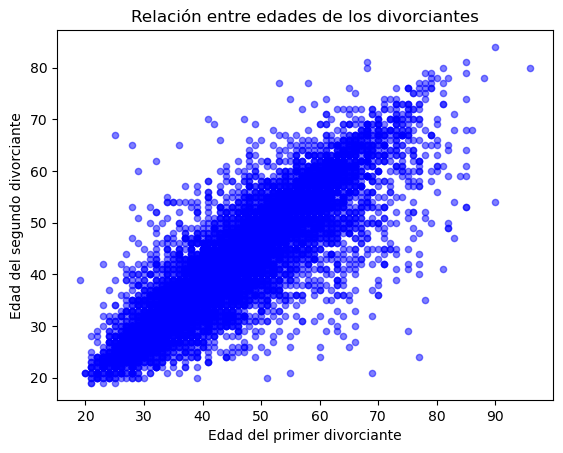

In [100]:
divorcios.plot.scatter(x='edad_div1', y='edad_div2', alpha=0.5, color='blue')
plt.title('Relación entre edades de los divorciantes')
plt.xlabel('Edad del primer divorciante')
plt.ylabel('Edad del segundo divorciante')
plt.show()

La gráfica anterior muestra que existe una relación positiva y significativa entre las personas que se casan, lo que sugiere que ambas variables tienen una correlación lo suficientemente fuerte como para considerar que su relación puede modelarse mediante una combinación lineal entre ambas columnas.

Calculamos los años que duraron las parejas casados

In [101]:
divorcios['años_matrimonio'] = divorcios['duracion_matrimonio'].dt.days / 365

In [102]:
divorcios = divorcios[['municipio','años_matrimonio','edad_div1', 'edad_div2']]

Para analizar los datos de divorcios, vamos a utilizar el algoritmo de agrupamiento K-Means, ya que es una herramienta eficaz para identificar patrones y dividir los datos en grupos basados en similitudes. Primero, seleccioné las variables que consideré más relevantes para el análisis: la edad_div1 (edad de la primera persona) y años_matrimonio (la duración del matrimonio). Antes de aplicar el modelo, escalé estos datos utilizando StandardScaler, para garantizar que ambas variables tuvieran la misma influencia en el proceso de agrupamiento. Esto es fundamental porque K-Means se basa en distancias, y las variables en diferentes escalas podrían sesgar los resultados.

Luego, configuré el modelo de K-Means para que dividiera los datos en tres grupos (n_clusters=3). Al entrenarlo con los datos escalados, obtuve una asignación de clúster para cada observación, que luego agregué al DataFrame original como una nueva columna llamada cluster.

In [103]:
features = ['edad_div1', 'años_matrimonio']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(divorcios[features])

kmeans = KMeans(n_clusters=3, random_state=42)
divorcios['cluster'] = kmeans.fit_predict(X_scaled)

/tmp/ipykernel_125/2043540954.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  divorcios['cluster'] = kmeans.fit_predict(X_scaled)


In [104]:
hola = divorcios.groupby(['cluster','municipio'], as_index= False)[['edad_div1','edad_div2','años_matrimonio']].mean()

In [105]:
hola.groupby('cluster').size()

cluster
0    63
1    65
2    62
dtype: int64

In [106]:
hola

,cluster,municipio,edad_div1,edad_div2,años_matrimonio
0,0,1,28.000000,27.500000,9.217808
1,0,2,33.630631,32.846847,8.304949
2,0,3,32.742857,30.600000,7.754286
3,0,4,35.818182,32.363636,7.667497
4,0,5,31.500000,27.625000,6.926370
...,...,...,...,...,...
185,2,68,58.000000,56.000000,33.900000
186,2,69,58.200000,51.600000,33.896438
187,2,70,55.090909,53.909091,33.251557
188,2,71,61.685714,57.657143,37.683757


In [107]:
divorcios['diferencia'] = abs(divorcios['edad_div1'] - divorcios['edad_div2'])

/tmp/ipykernel_125/4030559899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  divorcios['diferencia'] = abs(divorcios['edad_div1'] - divorcios['edad_div2'])


Text(0.5, 1.0, 'Sin Cluster')

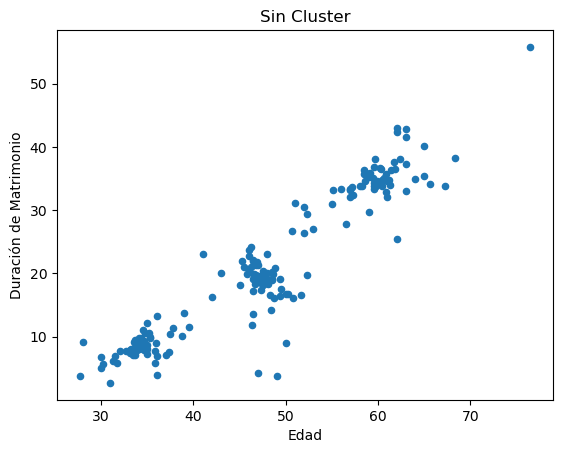

In [108]:
hola.plot(kind='scatter',x='edad_div1',y='años_matrimonio')
plt.xlabel('Edad')
plt.ylabel('Duración de Matrimonio')
plt.title('Sin Cluster')

Text(0.5, 1.0, 'Cluster')

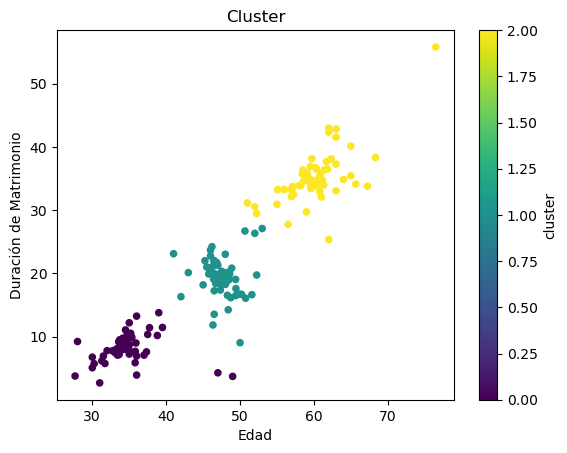

In [109]:
hola.plot(kind='scatter',x='edad_div1',y='años_matrimonio', c='cluster', colormap='viridis')
plt.xlabel('Edad')
plt.ylabel('Duración de Matrimonio')
plt.title('Cluster')

Este proceso me permitió identificar diferentes grupos en los datos, como parejas jóvenes con matrimonios cortos, parejas mayores con matrimonios largos, o casos intermedios. Creo que esta segmentación puede ofrecer una perspectiva más clara para entender los patrones en los divorcios y ayudará a realizar análisis más profundos en el futuro.

En la gráfica anterior, cada punto representa un municipio y está asociado a un clúster específico. Se pueden observar tres áreas principales de concentración, que corresponden a los municipios con características similares dentro de cada clúster. Estas acumulaciones reflejan la agrupación de municipios según las variables analizadas, destacando patrones comunes en cada grupo.

Por lo que usaremos el metodo K-NN para encontrar los vecinos mas cercanos a cada punto.

In [110]:
distancia_max = 2 
n_vecinos = 5     


knn = NearestNeighbors(n_neighbors=n_vecinos, radius=distancia_max)
knn.fit(hola[['edad_div1','años_matrimonio']])

distancias, indices = knn.radius_neighbors(hola[['edad_div1','años_matrimonio']])

hola['vecinos_indices'] = [list(idx) for idx in indices]
hola['num_vecinos_cercanos'] = [len(list(idx)) for idx in indices]

En la siguiente tabla, hemos añadido dos nuevas columnas. La primera indica el índice de los vecinos más cercanos a cada elemento, mientras que la segunda muestra el número total de vecinos más cercanos encontrados para cada caso.

In [111]:
hola.sort_values(by='num_vecinos_cercanos', ascending=False).head(50)

,cluster,municipio,edad_div1,edad_div2,años_matrimonio,vecinos_indices,num_vecinos_cercanos
48,0,56,34.300000,33.100000,8.741644,"[47, 1, 2, 62, 61, 11, 56, 14, 50, 16, 42, 40,...",38
7,0,12,34.472222,32.944444,8.206925,"[47, 1, 2, 62, 61, 11, 56, 14, 50, 16, 42, 40,...",37
13,0,18,34.371162,32.546061,8.946098,"[47, 1, 62, 61, 11, 56, 14, 50, 16, 42, 40, 21...",36
24,0,30,34.944067,33.323507,8.010085,"[47, 1, 62, 61, 11, 56, 14, 50, 16, 42, 40, 21...",36
20,0,26,34.360656,32.114754,8.248057,"[47, 1, 2, 62, 61, 11, 56, 14, 50, 16, 42, 40,...",36
9,0,14,34.600000,35.400000,7.955616,"[47, 1, 2, 62, 61, 11, 56, 14, 50, 16, 42, 40,...",36
36,0,42,34.331288,31.990798,8.223136,"[47, 1, 2, 62, 61, 11, 56, 14, 50, 16, 42, 40,...",36
16,0,21,34.017857,32.267857,8.743151,"[47, 1, 2, 62, 61, 11, 56, 14, 50, 16, 42, 40,...",36
23,0,29,34.638298,32.744681,9.042278,"[47, 1, 62, 61, 56, 14, 50, 16, 40, 21, 30, 27...",34
27,0,33,33.863636,32.443182,8.658873,"[47, 1, 2, 62, 61, 11, 56, 14, 50, 16, 42, 40,...",34


Al realizar una gráfica de los municipios agrupados por clúster, destacando aquellos con mayor número de vecinos cercanos, obtenemos el siguiente resultado.

Text(0.5, 1.0, 'Cluster')

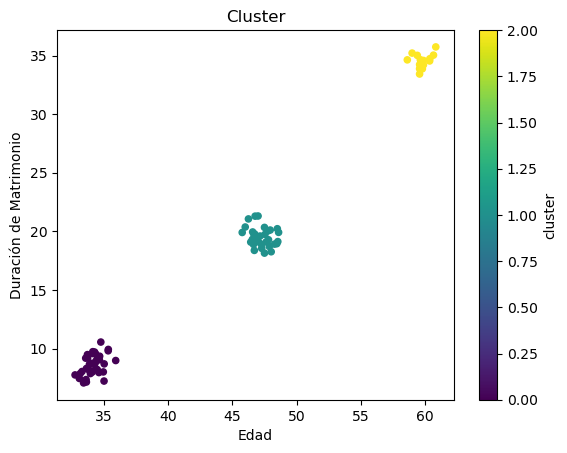

In [122]:
hola[(hola.num_vecinos_cercanos> 20)].plot(kind='scatter',x='edad_div1',y='años_matrimonio', c='cluster', colormap='viridis')
plt.xlabel('Edad')
plt.ylabel('Duración de Matrimonio')
plt.title('Cluster')

De manera similar graficámos los municipios con menos vecinos.

In [119]:
hola[hola.num_vecinos_cercanos < 10]['municipio'].unique()

array([ 1,  8, 11, 13, 15, 20, 28, 31, 32, 34, 37, 39, 40, 50, 52, 53, 59,
       61, 62, 67, 68, 69,  5,  9, 10, 14, 21, 22, 35, 45, 47, 55, 57, 64,
       66, 23, 36, 38, 41, 44, 46, 49, 56, 70, 71])

Text(0.5, 1.0, 'Cluster')

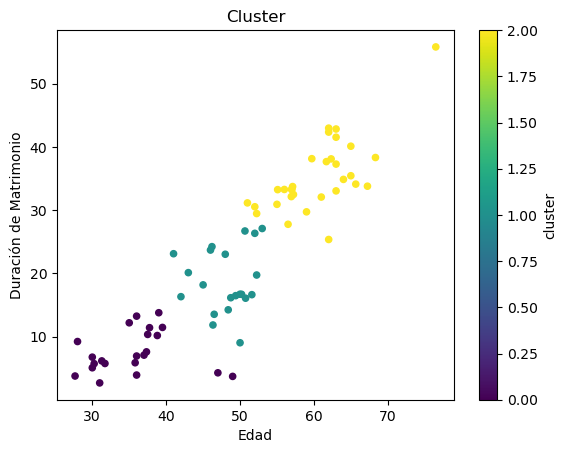

In [120]:
hola[hola.num_vecinos_cercanos < 10].plot(kind='scatter',x='edad_div1',y='años_matrimonio', c='cluster', colormap='viridis')
plt.xlabel('Edad')
plt.ylabel('Duración de Matrimonio')
plt.title('Cluster')